In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [60]:
print(len(df))
print(df.shape)

4009
(4009, 12)


In [61]:
#fetch model col
df["model"]

0       Utility Police Interceptor Base
1                          Palisade SEL
2                         RX 350 RX 350
3                      Q50 Hybrid Sport
4             Q3 45 S line Premium Plus
                     ...               
4004               Continental GT Speed
4005               S4 3.0T Premium Plus
4006                             Taycan
4007                       F-150 Raptor
4008                       X3 xDrive30i
Name: model, Length: 4009, dtype: object

In [62]:
print(df["model_year"].mean())
print(df["model_year"].max())
print(df["model_year"].min())

2015.515589922674
2024
1974


0       10300
1       38005
2       54598
3       15500
4       34999
        ...  
4003    25900
4005    53900
4006    90998
4007    62999
4008    40000
Name: price, Length: 3981, dtype: int64


<Axes: >

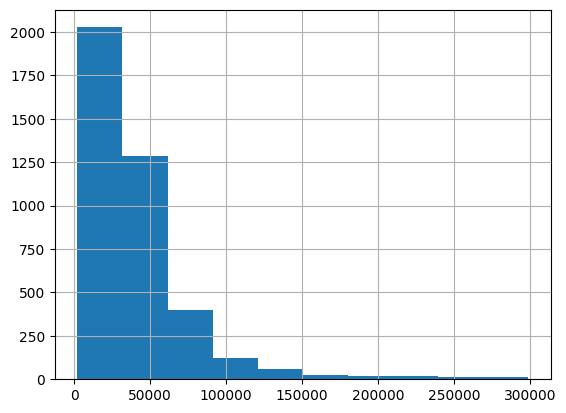

In [63]:
# remove $ and , from the price col and convert the string to int
price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int) 
#update the dataset to include the cleaned price column
df["price"] = price
#show prices that are below million
print(price[price < 300000])
price[price < 300000].hist()

In [64]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [65]:
#get the Hyundai cars and calculate the mean
df_hyundai = df[df["brand"] == "Hyundai"]
print(df_hyundai["price"].mean())
#get all Ford cars
df_ford = df[df["brand"] == "Ford"]
print(df_ford["price"].mean())

18946.875
36240.88082901554


In [72]:
#Hot encoding brand cols for nn training
pd.get_dummies(df["brand"])

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4005,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
#model_year and price cols are numeric which can be useful for training
df[["model_year", "price"]]
#find the coefficient correlation between cols to see the relationship
df[["model_year", "price"]].corr()

,model_year,price
model_year,1.000000,0.199496
price,0.199496,1.000000


the correlation between model_year and price.

It’s positive (~0.20) → meaning newer model years tend to have slightly higher prices.

But it’s weak (since it’s close to 0).

In [97]:
#creating a new dataframe
df_new = pd.DataFrame({"model_year": [1,2,3], "price": [1,2,3], "age": [3,2,1]})
df_new.corr()


,model_year,price,age
model_year,1.0,1.0,-1.0
price,1.0,1.0,-1.0
age,-1.0,-1.0,1.0


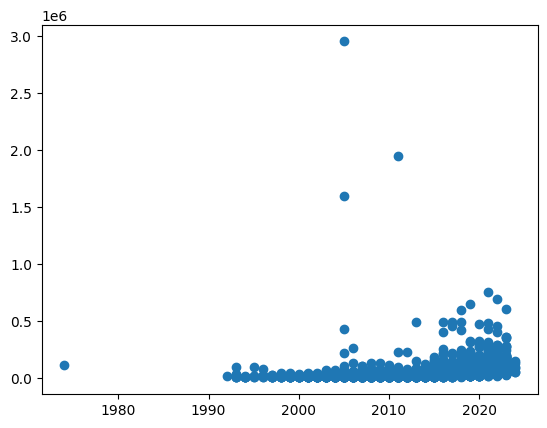

In [91]:
#scatter plot between model_year and prices
plt.scatter(df["model_year"], df["price"])
plt.show()